In [103]:
from skimage.io import imread
from skimage import img_as_float
import pylab
from sklearn.cluster import KMeans
from math import log10

In [2]:
%matplotlib inline

In [3]:
im = imread('parrots.jpg')

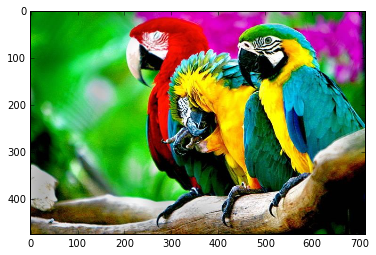

In [4]:
pylab.imshow(im)

In [28]:
image = img_as_float(im)

In [11]:
image

array([[[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21568627,  0.01568627],
        [ 0.        ,  0.20392157,  0.01568627],
        [ 0.01176471,  0.21568627,  0.02745098]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.01568627],
        [ 0.        ,  0.20392157,  0.01568627],
        [ 0.00784314,  0.2       ,  0.01568627]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.01568627],
        [ 0.        ,  0.20392157,  0.01568627],
        [ 0.00784314,  0.2       ,  0.01568627]],

       ..., 
       [[ 0.47843137,  0.38039216,  0.01960784],
        

In [29]:
image = image.reshape((int(image.shape[1])*int(image.shape[0]),3))

In [30]:
image

array([[ 0.01176471,  0.49019608,  0.01568627],
       [ 0.01176471,  0.49019608,  0.01568627],
       [ 0.00784314,  0.49411765,  0.00784314],
       ..., 
       [ 0.03137255,  0.08235294,  0.10588235],
       [ 0.09411765,  0.14901961,  0.19215686],
       [ 0.09411765,  0.15686275,  0.21568627]])

In [127]:
median

[array([ 0.01176471,  0.07058824,  0.01176471,  0.        ]),
 array([ 0.79607843,  0.82745098,  0.78823529,  1.        ]),
 array([ 0.44705882,  0.6627451 ,  0.43921569,  2.        ]),
 array([ 0.98431373,  0.84313725,  0.01960784,  3.        ]),
 array([ 0.78823529,  0.01568627,  0.70588235,  4.        ]),
 array([ 0.02352941,  0.56470588,  0.58823529,  5.        ]),
 array([ 0.54901961,  0.23529412,  0.03137255,  6.        ]),
 array([ 0.05882353,  0.64313725,  0.02352941,  7.        ])]

In [93]:
mean

[array([ 0.05526974,  0.11755758,  0.05210937,  0.        ]),
 array([ 0.78761312,  0.82301712,  0.79541267,  1.        ]),
 array([ 0.45217501,  0.66808792,  0.44174561,  2.        ]),
 array([ 0.95247529,  0.8273484 ,  0.0477259 ,  3.        ]),
 array([ 0.77559333,  0.09153023,  0.68913568,  4.        ]),
 array([ 0.05032137,  0.54890762,  0.59234731,  5.        ]),
 array([ 0.60654519,  0.21709529,  0.06992745,  6.        ]),
 array([ 0.09591213,  0.63496641,  0.06809334,  7.        ])]

In [125]:
im_median

array([[ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       [ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       [ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       ..., 
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ],
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ],
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ]])

In [131]:
im

array([[ 0.01176471,  0.49019608,  0.01568627,  7.        ],
       [ 0.01176471,  0.49019608,  0.01568627,  7.        ],
       [ 0.00784314,  0.49411765,  0.00784314,  7.        ],
       ..., 
       [ 0.03137255,  0.08235294,  0.10588235,  0.        ],
       [ 0.09411765,  0.14901961,  0.19215686,  0.        ],
       [ 0.09411765,  0.15686275,  0.21568627,  0.        ]])

In [96]:
im_median

array([[ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       [ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       [ 0.09591213,  0.63496641,  0.06809334,  7.        ],
       ..., 
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ],
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ],
       [ 0.05526974,  0.11755758,  0.05210937,  0.        ]])

In [132]:
def square(I_pixel, K_pixel, i):
    delta = I_pixel[i] - K_pixel[i]
    return delta * delta

def MSE_RGB(I, K):
    deltas = []
    for i in range(0, len(I)):
        deltas.append(square(I[i], K[i], 0) + square(I[i], K[i], 1) + square(I[i], K[i], 2))

    return sum(deltas) / len(I) / 3

def PSNR(MSE):
    return - 10 * log10(MSE)

In [133]:
mse_mean = MSE_RGB(im, im_mean)
mse_median = MSE_RGB(im, im_median)

In [135]:
mse_mean

0.014175611028219079

In [136]:
psnr_mean = PSNR(mse_mean)
psnr_median = PSNR(mse_median)

In [137]:
psnr_mean

18.484582121200962

In [138]:
psnr_median

18.179628991034843

In [141]:
for j in range(1, 20 + 1):
    km = KMeans(init= 'k-means++', random_state=241, n_clusters=j)
    km.fit(image)
    im = np.concatenate((image.T, [km.labels_]), axis=0).T
    im_median = im.copy()
    im_mean = im.copy()
    median = [np.median(im[im[:,3]==i], axis=0) for i in range(0,8)]
    mean = [np.mean(im[im[:,3]==i], axis=0) for i in range(0,8)]
    for i in range(0,8):
        im_median[im_median[:,3]==i] = median[i]
        im_mean[im_mean[:,3]==i] = mean[i]
    
    mean_MSE = MSE_RGB(im, im_mean)
    median_MSE = MSE_RGB(im, im_median)

    mean_PSNR = PSNR(mean_MSE)
    median_PSNR = PSNR(median_MSE)

    print()
    print(j, "clusters:")
    print("  Mean:    MSE=", '{0:.4f}'.format(mean_MSE), " PSNR=", '{0:.2f}'.format(mean_PSNR))
    print("  Median:  MSE=", '{0:.4f}'.format(median_MSE), " PSNR=", '{0:.2f}'.format(median_PSNR))


()
(1, 'clusters:')
('  Mean:    MSE=', '0.1031', ' PSNR=', '9.87')
('  Median:  MSE=', '0.1121', ' PSNR=', '9.50')
()
(2, 'clusters:')
('  Mean:    MSE=', '0.0610', ' PSNR=', '12.15')
('  Median:  MSE=', '0.0673', ' PSNR=', '11.72')
()
(3, 'clusters:')
('  Mean:    MSE=', '0.0478', ' PSNR=', '13.21')
('  Median:  MSE=', '0.0538', ' PSNR=', '12.69')
()
(4, 'clusters:')
('  Mean:    MSE=', '0.0362', ' PSNR=', '14.42')
('  Median:  MSE=', '0.0393', ' PSNR=', '14.05')
()
(5, 'clusters:')
('  Mean:    MSE=', '0.0276', ' PSNR=', '15.59')
('  Median:  MSE=', '0.0299', ' PSNR=', '15.25')
()
(6, 'clusters:')
('  Mean:    MSE=', '0.0218', ' PSNR=', '16.61')
('  Median:  MSE=', '0.0245', ' PSNR=', '16.12')
()
(7, 'clusters:')
('  Mean:    MSE=', '0.0170', ' PSNR=', '17.70')
('  Median:  MSE=', '0.0182', ' PSNR=', '17.40')
()
(8, 'clusters:')
('  Mean:    MSE=', '0.0142', ' PSNR=', '18.48')
('  Median:  MSE=', '0.0152', ' PSNR=', '18.18')
()
(9, 'clusters:')
('  Mean:    MSE=', '0.0116', ' PSNR='

C:\Users\Oksana\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Oksana\Anaconda2\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [148]:
file = open('ans1', 'w')
file.write('11')
file.close()

In [149]:
!less ans1

11


In [42]:
km.labels_.shape

(337962L,)

In [44]:
km.labels_

array([7, 7, 7, ..., 0, 0, 0])